# AV – Trabalho: Criação de um classificador

In [2]:
# Este exemplo carrega a base Wine da UCI, treina uma Arvore de decisao usando 
# holdout e outra usando validacao cruzada com 10 pastas. 

# Importa bibliotecas necessarias 
import numpy as np
import urllib
from sklearn import tree
from sklearn import  model_selection
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
mpl.style.use('ggplot')

#### A base consistem em 11 colunas:
1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)
- 1 building_windows_float_processed
- 2 building_windows_non_float_processed
- 3 vehicle_windows_float_processed
- 4 vehicle_windows_non_float_processed (none in this database)
- 5 containers
- 6 tableware
- 7 headlamps

In [3]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data", header=None, names=['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Glass_Type'], index_col=0)

In [4]:
names=['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']

In [5]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_Type
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
data.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_Type
210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 1 to 214
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RI          214 non-null    float64
 1   Na          214 non-null    float64
 2   Mg          214 non-null    float64
 3   Al          214 non-null    float64
 4   Si          214 non-null    float64
 5   K           214 non-null    float64
 6   Ca          214 non-null    float64
 7   Ba          214 non-null    float64
 8   Fe          214 non-null    float64
 9   Glass_Type  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.4 KB


In [8]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


#### A classe é composta de 7 tipos
- 1 building_windows_float_processed
- 2 building_windows_non_float_processed
- 3 vehicle_windows_float_processed
- 4 vehicle_windows_non_float_processed (none in this database)
- 5 containers
- 6 tableware
- 7 headlamps

In [9]:
data[['Glass_Type']].value_counts()

Glass_Type
2             76
1             70
7             29
3             17
5             13
6              9
dtype: int64

<i> Uma nota é que caso não exite o valor 4 nessa base ou seja nosso algoritmo ficara perdido ao tentar prever uma base com valores 4.</i>

In [10]:
X = data.iloc[:,:9]
y = data.iloc[:,-1]

## EXEMPLO USANDO HOLDOUT
#### Holdout -> dividindo a base em treinamento (70%) e teste (30%), estratificada

In [12]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state=42, stratify=y)

# declara o classificador
clfa = tree.DecisionTreeClassifier(criterion='entropy')

# treina o classificador
clfa.fit(X_train, y_train)

# testa usando a base de testes
predicted=clfa.predict(X_test)

# calcula a acuracia na base de teste (taxa de acerto)
score=clfa.score(X_test, y_test)

# calcula a matriz de confusao
matrix = confusion_matrix(y_test, predicted)

# apresenta os resultados
print("\nResultados baseados em Holdout 70/30")
print("Taxa de acerto = %.2f " % score)
print("Matriz de confusao:")
print(matrix)


Resultados baseados em Holdout 70/30
Taxa de acerto = 0.78 
Matriz de confusao:
[[17  3  0  0  0  1]
 [ 1 17  3  1  0  1]
 [ 2  1  2  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  0  3  0]
 [ 0  1  0  0  0  8]]


## EXEMPLO USANDO VALIDACAO CRUZADA

C:\Users\giuic\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\giuic\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"

Resultados baseados em Validacao Cruzada
Qtde folds: 10:
Taxa de Acerto: 0.62
Desvio padrao: 0.12
Matriz de confusao:
[[45 19  4  0  0  2]
 [12 46 11  3  0  4]
 [ 7  3  7  0  0  0]
 [ 0  4  0  9  0  0]
 [ 0  1  0  0  8  0]
 [ 1  2  0  2  1 23]]

Arvore gerada no experimento baseado em Holdout


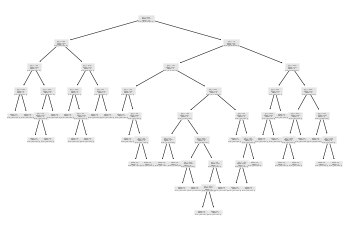

In [13]:

clfb = tree.DecisionTreeClassifier(criterion='entropy')
folds=10
result = model_selection.cross_val_score(clfb, X, y, cv=folds)

print("\nResultados baseados em Validacao Cruzada")
print("Qtde folds: %d:" % folds)
print("Taxa de Acerto: %.2f" % result.mean())
print("Desvio padrao: %.2f" % result.std())

# matriz de confusÃ£o da validacao cruzada
Z = model_selection.cross_val_predict(clfb, X, y, cv=folds)
cm=confusion_matrix(y, Z)
print("Matriz de confusao:")
print(cm)

#imprime a arvore gerada
print("\nArvore gerada no experimento baseado em Holdout")
clfb.fit(X_train, y_train)
plot_tree(clfa)
plt.show()


In [15]:
text_representation = tree.export_text(clfb)
print(text_representation)

|--- feature_2 <= 2.70
|   |--- feature_6 <= 9.77
|   |   |--- feature_3 <= 1.70
|   |   |   |--- feature_5 <= 0.16
|   |   |   |   |--- class: 6
|   |   |   |--- feature_5 >  0.16
|   |   |   |   |--- class: 7
|   |   |--- feature_3 >  1.70
|   |   |   |--- feature_1 <= 14.08
|   |   |   |   |--- feature_5 <= 0.38
|   |   |   |   |   |--- class: 7
|   |   |   |   |--- feature_5 >  0.38
|   |   |   |   |   |--- class: 5
|   |   |   |--- feature_1 >  14.08
|   |   |   |   |--- class: 7
|   |--- feature_6 >  9.77
|   |   |--- feature_5 <= 0.03
|   |   |   |--- feature_1 <= 12.41
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  12.41
|   |   |   |   |--- class: 6
|   |   |--- feature_5 >  0.03
|   |   |   |--- feature_4 <= 72.21
|   |   |   |   |--- class: 2
|   |   |   |--- feature_4 >  72.21
|   |   |   |   |--- feature_1 <= 13.93
|   |   |   |   |   |--- class: 5
|   |   |   |   |--- feature_1 >  13.93
|   |   |   |   |   |--- class: 2
|--- feature_2 >  2.70
|   |--- feature

In [15]:
from dtreeviz.trees import dtreeviz

viz = dtreeviz(clfa,X,y,target_name='', feature_names=names,class_names=list(['windows_f','windows','autowindows_f','autowindows','containers','table','headlamps']))

In [16]:
viz.view()

ExecutableNotFound: failed to execute ['dot', '-Tsvg', '-o', 'C:\\Users\\giuic\\AppData\\Local\\Temp\\DTreeViz_7328.svg', 'C:/Users/giuic/AppData/Local/Temp\\DTreeViz_7328'], make sure the Graphviz executables are on your systems' PATH